In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#Loading the dataset
car_dataset=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Displays first five rows
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car_dataset.shape

(4340, 8)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
#Checking the no of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

There are no missing values in our dataset.If we have missing values,we can handle those values by following techniques 1.Imputation:Replace missing values with mean,median and mode of the our dataset
2.Deletion:Deleting the missing values if there are comparatively less.
3.Prediction:Use other variables to predict the missing values.

In [9]:
#checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


From output we can see that,Diesel cars are 2153,petrol cars are 2123,CNG are 40,LPG are 23 and Electric cars are 1

In [10]:
#encoding the "Fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
#encoding the "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
#encoding the "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
#encoding the "owner" column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [11]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [12]:
car_dataset.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0,0
4339,Renault KWID RXT,2016,225000,40000,0,0,0,0


In [13]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


Spliting data into dependent variables(y) and independent variables(X)

In [14]:
X=car_dataset.drop(['name','selling_price'],axis=1)
y=car_dataset['selling_price']

splitting data into training and testing data

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model training

**1.Linear Regression**

Linear regression is used to understand the relationship between a dependent variable (the one we are trying to predict) and one or more independent variables (the predictors). It assumes that there is a linear relationship between the independent variables and the dependent variable.
Our primary objective while using linear regression is to locate the best-fit line, which implies that the error between the predicted and actual values should be kept to a minimum. There will be the least error in the best-fit line.


In [16]:
lr_model=LinearRegression()

In [17]:
lr_model.fit(X_train,y_train)

LinearRegression()

Model evaluation

In [18]:
#prediction on training data
training_data_prediction=lr_model.predict(X_train)

In [19]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.45232342921289426


Visulasize the actual prices and predicted prices

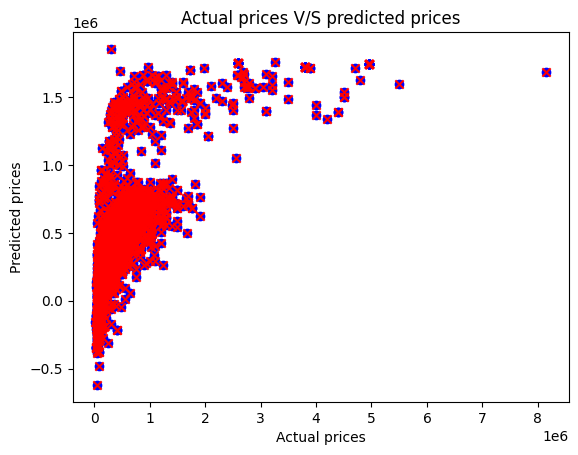

In [25]:
plt.scatter(y_train,training_data_prediction,label='Actual Prices', marker='o', color='blue')
plt.scatter(y_train,training_data_prediction,label='Predicted Prices', marker='x', color='red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices V/S predicted prices")
plt.show()

From above visualization we could see that actual prices and predicted prices are close to eachother (there is no much differences between actual and predicted prices)




In [27]:
#prediction on test data
test_data_prediction=lr_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.3873045160130898


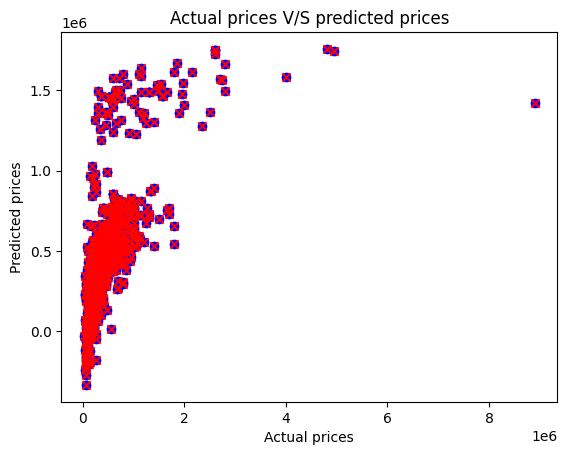

In [29]:
plt.scatter(y_test,test_data_prediction,label='Actual Prices', marker='o', color='blue')
plt.scatter(y_test,test_data_prediction,label='Predicted Prices', marker='x', color='red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices V/S predicted prices")
plt.show()

**2.Lasso Regression**

Lasso Regression is a technique used for regularizing a linear regression model, it adds a penalty term to the linear regression objective function to prevent overfitting.

In [30]:
lasso_regression_model=Lasso()

In [31]:
lasso_regression_model.fit(X_train,y_train)

Lasso()

In [38]:
#prediction on training data
training_data_prediction=lasso_regression_model.predict(X_train)

In [39]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.3873045160130898


For linear Regression R squared error is 0.45
Lasso Regression R squared error is 0.38

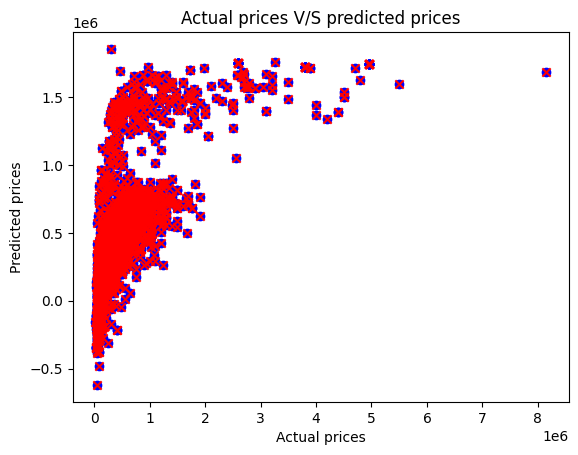

In [40]:
plt.scatter(y_train,training_data_prediction,label='Actual Prices', marker='o', color='blue')
plt.scatter(y_train,training_data_prediction,label='Predicted Prices', marker='x', color='red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices V/S predicted prices")
plt.show()

In [41]:
#prediction on test data
test_data_prediction=lasso_regression_model.predict(X_test)

In [42]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.3873054262732817


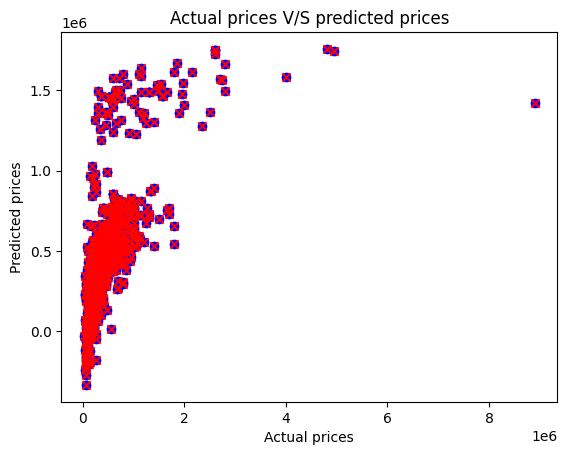

In [43]:
plt.scatter(y_test,test_data_prediction,label='Actual Prices', marker='o', color='blue')
plt.scatter(y_test,test_data_prediction,label='Predicted Prices', marker='x', color='red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices V/S predicted prices")
plt.show()